<a href="https://colab.research.google.com/github/keerthi760/base/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as ttp#To break dataset for training and Traing
from sklearn.metrics import classification_report#To generate classification report
import seaborn as sns
data=pd.read_csv("/content/heart.csv")
print(data)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

In [ ]:
first_data=data.head(36)
second_data=data.tail(48)

In [ ]:
first_data["class"]=1
second_data["class"]=0

<ipython-input-3-231bea9336cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_data["class"]=1
<ipython-input-3-231bea9336cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_data["class"]=0


In [ ]:
first_data.shape,second_data.shape

((36, 15), (48, 15))

In [ ]:
result=pd.concat([first_data,second_data],axis=0)
result.to_csv("result.csv")

In [ ]:
result=pd.read_csv("/content/result.csv")
print(result)

    Unnamed: 0  age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  \
0            0   63    1   3     145   233    1        0       150     0   
1            1   37    1   2     130   250    0        1       187     0   
2            2   41    0   1     130   204    0        0       172     0   
3            3   56    1   1     120   236    0        1       178     0   
4            4   57    0   0     120   354    0        1       163     1   
..         ...  ...  ...  ..     ...   ...  ...      ...       ...   ...   
79         298   57    0   0     140   241    0        1       123     1   
80         299   45    1   3     110   264    0        1       132     0   
81         300   68    1   0     144   193    1        1       141     0   
82         301   57    1   0     130   131    0        1       115     1   
83         302   57    0   1     130   236    0        0       174     0   

    oldpeak  slp  caa  thall  output  class  
0       2.3    0    0      1       1     

age
37    1
38    1
40    2
41    2
42    2
43    1
44    4
45    2
46    3
47    1
48    1
49    2
50    2
51    2
52    4
53    2
54    4
55    2
56    3
57    9
58    8
59    5
61    5
62    1
63    4
64    1
65    2
66    3
67    2
68    1
69    1
71    1
Name: chol, dtype: int64


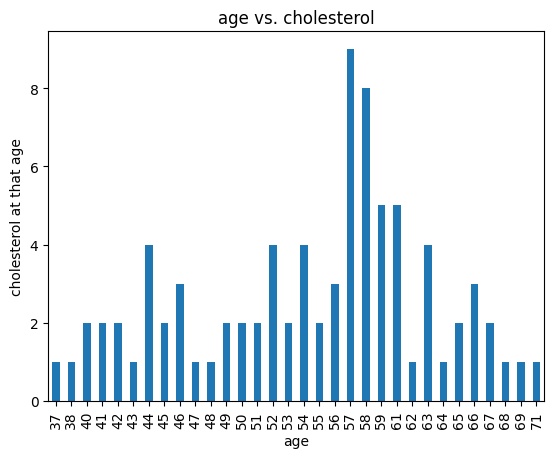

In [ ]:
print(result.groupby(["age"])["chol"].count())
result.groupby(["age"])["chol"].count().plot(kind='bar')
plt.title("age vs. cholesterol")
plt.xlabel("age")
plt.ylabel("cholesterol at that age")
plt.show()

class
0    48
1    36
Name: chol, dtype: int64
0-no
1-yes


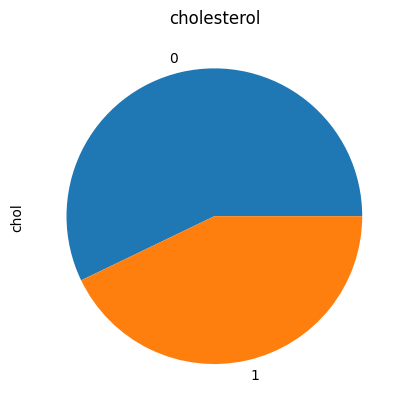

In [ ]:
print(result.groupby(["class"])["chol"].count())
print('0-no\n1-yes')
result.groupby(["class"])["chol"].count().plot(kind="pie")
plt.title("cholesterol")
plt.show()

In [ ]:
testing_data=result.drop(["Unnamed: 0","sex","cp","trtbps","fbs","restecg","thalachh","exng","oldpeak","slp","caa","thall","output","age"],axis=1)
print(testing_data)

    chol  class
0    233      1
1    250      1
2    204      1
3    236      1
4    354      1
..   ...    ...
79   241      0
80   264      0
81   193      0
82   131      0
83   236      0

[84 rows x 2 columns]


In [ ]:
#shuffling data
testing_data=testing_data.sample(frac=1)
testing_data.head(10)

,chol,class
1,250,1
42,230,0
24,199,1
32,219,1
57,218,0
23,243,1
65,207,0
78,176,0
76,187,0
22,226,1


In [ ]:
testing_data.isnull().sum()

chol     0
class    0
dtype: int64

In [ ]:
x=testing_data["chol"]
y=testing_data["class"]

In [ ]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [ ]:
x_train = x_train.astype(str)
x_test = x_test.astype(str)

In [ ]:
vector=TfidfVectorizer()
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train)
accuracy=LR.score(xv_test,y_test).round(2)
print("Accuracy is",accuracy)
predict_LR=LR.predict(xv_test)
print(classification_report(y_test,predict_LR))

Accuracy is 0.86
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.75      0.60      0.67         5

    accuracy                           0.86        21
   macro avg       0.82      0.77      0.79        21
weighted avg       0.85      0.86      0.85        21



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#define image size and batch size
IMG_SIZE=224
BATCH_SIZE=32

In [ ]:
# Define data generators for train, validation and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Brain_Tumor_Detection/Brain_Tumor_Detection/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

Found 2400 images belonging to 2 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Brain_Tumor_Detection/Brain_Tumor_Detection/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 600 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Brain_Tumor_Detection/Brain_Tumor_Detection/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 60 images belonging to 1 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5
75/75 [==============================] - 295s 4s/step - loss: 0.0177 - accuracy: 0.9933 - val_loss: 0.0217 - val_accuracy: 0.9933
Epoch 2/5
75/75 [==============================] - 269s 4s/step - loss: 0.0274 - accuracy: 0.9929 - val_loss: 0.0287 - val_accuracy: 0.9883
Epoch 3/5
75/75 [==============================] - 266s 4s/step - loss: 0.0265 - accuracy: 0.9921 - val_loss: 0.0153 - val_accuracy: 0.9933
Epoch 4/5
75/75 [==============================] - 267s 4s/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 5/5
75/75 [==============================] - 267s 4s/step - loss: 6.8874e-04 - accuracy: 1.0000 - val_loss: 8.3420e-04 - val_accuracy: 1.0000


In [ ]:
model.save("Model.h5","label.txt")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#test your image
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

#load the model
model = load_model('/content/Model.h5')
#classes
class_names = ['You have Brain Tumor','You do not have Brain Tumor']
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)


In [ ]:
image = Image.open("/content/drive/MyDrive/Brain_Tumor_Detection/Brain_Tumor_Detection/test/pred/pred13.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array


In [ ]:
# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
confidence_score = prediction[0][index]
# Print prediction and confidence score
print("Result: ", class_names[index], end="")
print("\n")
print("Accuracy: ", confidence_score)

1/1 [==============================] - 0s 223ms/step
Result:  You have Brain Tumor

Accuracy:  0.058406767
